# Example of pole placement with discrete PI controller
We have stable first-order plant model
$$ H(z) = \frac{b}{z-a} $$
and discrete-time PI controller
$$ F(z) = K_c \left( 1 + \frac{h/T_i}{z-1} \right) = K_c \frac{z-1+h/T_i}{z-1}. $$
We want to find controller parameters $K_c$ and $T_i$ such that the closed-loop system has two poles in $z = \alpha$.
### Characteristic equation
\begin{align}
  1 + H(z)F_{PI}(z) &= 0\\
  (z-1)(z-a) + K_c b (z - 1 + h/T_i) &= 0
\end{align}
### Characteristic polynomial
$$\underbrace{(z-1)(z-a) + K_c b (z - 1 + h/T_i)}_{\text{parameterized}} = \underbrace{(z-\alpha)^2}_{\text{desired}} $$
$$ z^2 - (1+a -K_cb)z + K_cb(h/T_i - 1)+a = z^2 -2\alpha z + \alpha^2 $$
\begin{align}
  1 + a - K_c b &= 2\alpha \quad \Rightarrow \quad K_c = \frac{1+a-2\alpha}{b}\\
  K_cb(h/T_i - 1) + a &= \alpha^2 \quad \Rightarrow \quad \frac{1}{T_i} = \frac{1}{h}\left(1 + \frac{\alpha^2-a}{K_c b}\right) = \frac{1}{h} \left( \frac{(\alpha-1)^2}{1 + a - 2\alpha}\right) 
\end{align}


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import control.matlab as cm

## Symbolic solution

In [35]:
sy.init_printing()
aa, alphaa, hh, bb, KK, TT = sy.symbols('a, alpha, h, b, Kc, Ti', 
                                        real=True, positive=True)
zz = sy.symbols('z', real=False)

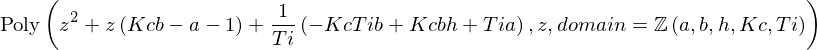

In [40]:
A = zz-aa
B = bb
R = zz-1
S = KK*(zz-1+hh/TT)
LHS = sy.Poly(A*R + B*S, zz)
LHS

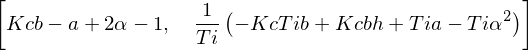

In [43]:
RHS = sy.Poly((zz-alphaa)**2, zz)
Dioph = LHS-RHS
coeffs = Dioph.coeffs()
coeffs

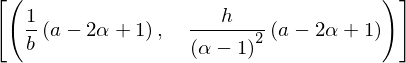

In [44]:
sol = sy.solve(coeffs, [KK, TT])
sol

## Numerical solution

In [45]:
# Plant
a = 0.9
b = 1
h = 0.1
H = cm.tf([b], [1, -a], h)

# Desired closed-loop pole
alpha = 0.8

# Controller parameters
Kc = (1+a-2*alpha)/b
Ti = h*(1+a-2*alpha)/(alpha-1)**2
F = Kc*cm.tf([1, -1+h/Ti], [1, -1], h)
F


0.3 z - 0.26
------------
    z - 1

dt = 0.1

In [46]:
# Check calculations
Hc = cm.feedback(F*H, 1)
cm.pole(Hc)

array([0.8+1.65261872e-08j, 0.8-1.65261872e-08j])

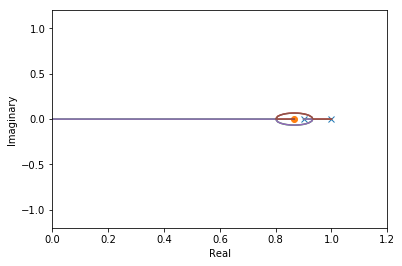

In [51]:
br, res = cm.rlocus(F*H)
plt.plot(np.real(br1), np.imag(br1))
plt.xlim((0,1.2))
plt.ylim((-1.2,1.2));

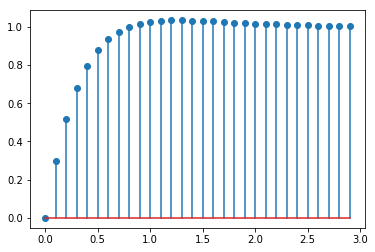

In [59]:
y, t = cm.step(Hc)
tt = h*np.arange(len(y))
plt.stem(tt[:30], y[:30]);